# Intro to Keras

![keras](resources/keras.png)

Main homepage: https://keras.io/  
Github: https://github.com/keras-team/keras  
Examples: https://github.com/keras-team/keras/tree/master/examples  
Docker: https://github.com/keras-team/keras/tree/master/docker  

#### Imports

In [ ]:
# Example based on https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function

import random

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

# Intro to MNIST dataset

#### Set variables, load dataset, split into train and test sets

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# set the number of output classes
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# convert integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize to a 0-1 scale
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 13s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### Examine dataset

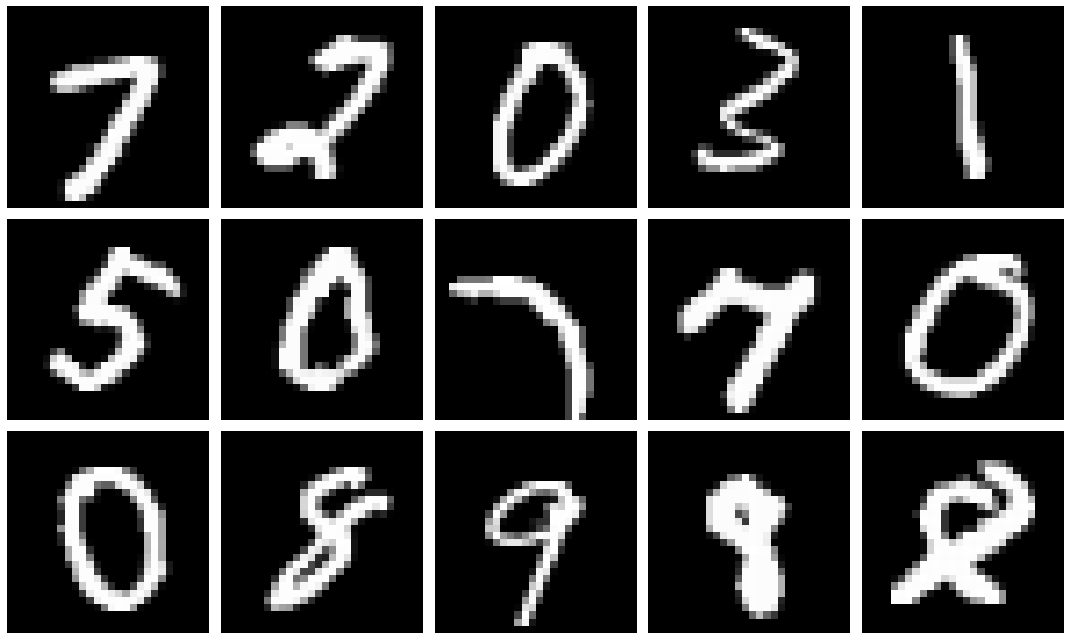

In [3]:
samples = random.sample(list(x_train), 15)

fig, ax = plt.subplots(3, 5, figsize=(15,9))

for i, sample in enumerate(samples):
    plt.subplot(3, 5, i+1)
    plt.imshow(sample.reshape(img_rows, img_cols), cmap=cm.gray)
    plt.axis('off')

plt.tight_layout()

# Building a model with Keras

#### Build and compile model

In [4]:
# Initialize model
model = Sequential()

# Input later is implicit

# Add hidden layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile model with loss funtion, optimizer, and metrics
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# You will see some warnings print out after this cell - you can ignore them

W0808 15:01:51.164957 140736984724416 deprecation_wrapper.py:119] From /Users/mpitlyk/miniconda3/envs/dlkeras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 15:01:51.186892 140736984724416 deprecation_wrapper.py:119] From /Users/mpitlyk/miniconda3/envs/dlkeras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 15:01:51.197024 140736984724416 deprecation_wrapper.py:119] From /Users/mpitlyk/miniconda3/envs/dlkeras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 15:01:51.230827 140736984724416 deprecation_wrapper.py:119] From /Users/mpitlyk/miniconda3/envs/dlkeras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_p

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Training a model with Keras

#### Train model on training set (short)

In [6]:
# Train on subset of data (during talk)

# the number of times to go through the entire dataset
epochs = 8

# the number of samples to use at each step
batch_size = 128

# Use a subset of training data
num_samples = 20000

history_short = model.fit(x_train[:num_samples], 
                    y_train[:num_samples],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=.15)

W0808 15:01:51.441982 140736984724416 deprecation.py:323] From /Users/mpitlyk/miniconda3/envs/dlkeras/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17000 samples, validate on 3000 samples
Epoch 1/8
17000/17000 [==============================] - 17s 995us/step - loss: 0.5981 - acc: 0.8109 - val_loss: 0.1507 - val_acc: 0.9523
Epoch 2/8
17000/17000 [==============================] - 16s 917us/step - loss: 0.1886 - acc: 0.9451 - val_loss: 0.0874 - val_acc: 0.9730
Epoch 3/8
17000/17000 [==============================] - 16s 912us/step - loss: 0.1294 - acc: 0.9621 - val_loss: 0.0737 - val_acc: 0.9767
Epoch 4/8
17000/17000 [==============================] - 16s 935us/step - loss: 0.0959 - acc: 0.9721 - val_loss: 0.0589 - val_acc: 0.9807
Epoch 5/8
17000/17000 [==============================] - 15s 887us/step - loss: 0.0775 - acc: 0.9755 - val_loss: 0.0561 - val_acc: 0.9833
Epoch 6/8
17000/17000 [==============================] - 15s 881us/step - loss: 0.0659 - acc: 0.9800 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 7/8
17000/17000 [==============================] - 15s 877us/step - loss: 0.0581 - acc: 0.9819 - val_loss: 0.0477 - v

In [7]:
# Save the model in case we want to load it later
# https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
model.save('mnist_short.h5')

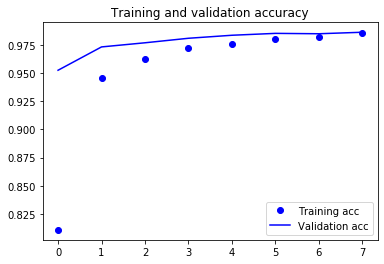

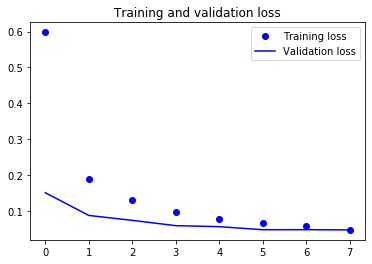

In [8]:
acc = history_short.history['acc']
val_acc = history_short.history['val_acc']
loss = history_short.history['loss']
val_loss = history_short.history['val_loss']

n_epochs = range(len(acc))

plt.plot(n_epochs, acc, 'bo', label='Training acc')
plt.plot(n_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(n_epochs, loss, 'bo', label='Training loss')
plt.plot(n_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Evaluate shorter model

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 162us/step
Test loss: 0.047877793723224024
Test accuracy: 0.9844


#### Train model on full set (before talk)

In [10]:
# Load full model

# Initalize model
model_long = Sequential()

# Add layers
model_long.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_long.add(Conv2D(64, (3, 3), activation='relu'))
model_long.add(MaxPooling2D(pool_size=(2, 2)))
model_long.add(Dropout(0.25))
model_long.add(Flatten())
model_long.add(Dense(128, activation='relu'))
model_long.add(Dropout(0.5))
model_long.add(Dense(num_classes, activation='softmax'))

# Compile model with loss funtion, optimizer, and metrics
model_long.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [11]:
# Train on full dataset (before talk)

# the number of times to go through the entire dataset
epochs = 20

# the number of samples to use at each step
batch_size = 128

history_long = model_long.fit(x_train, 
                    y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 44s 865us/step - loss: 0.2816 - acc: 0.9110 - val_loss: 0.0682 - val_acc: 0.9808
Epoch 2/20
51000/51000 [==============================] - 42s 828us/step - loss: 0.0909 - acc: 0.9726 - val_loss: 0.0509 - val_acc: 0.9859
Epoch 3/20
51000/51000 [==============================] - 42s 828us/step - loss: 0.0709 - acc: 0.9782 - val_loss: 0.0406 - val_acc: 0.9880
Epoch 4/20
51000/51000 [==============================] - 42s 827us/step - loss: 0.0573 - acc: 0.9826 - val_loss: 0.0415 - val_acc: 0.9882
Epoch 5/20
51000/51000 [==============================] - 43s 838us/step - loss: 0.0494 - acc: 0.9844 - val_loss: 0.0462 - val_acc: 0.9862
Epoch 6/20
51000/51000 [==============================] - 42s 828us/step - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0376 - val_acc: 0.9903
Epoch 7/20
51000/51000 [==============================] - 42s 826us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0

In [12]:
# Save model
model_long.save('mnist_20_epochs.h5')

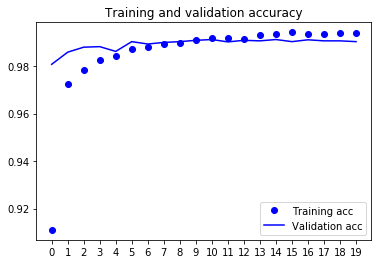

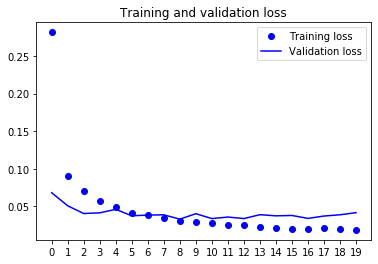

In [13]:
acc = history_long.history['acc']
val_acc = history_long.history['val_acc']
loss = history_long.history['loss']
val_loss = history_long.history['val_loss']

n_epochs = range(len(acc))

plt.plot(history_long.epoch, acc, 'bo', label='Training acc')
plt.plot(history_long.epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xticks(history_long.epoch)
plt.legend()

plt.figure()

plt.plot(history_long.epoch, loss, 'bo', label='Training loss')
plt.plot(history_long.epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(history_long.epoch)
plt.legend()

plt.show()

In [14]:
score = model_long.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 3s 264us/step
Test loss: 0.032882582351473226
Test accuracy: 0.9903


Accuracy is not the only metric to look at to evaulate a classification problem. Others include precision, recall, and the AUC.

#### View some predictions

In [15]:
# Get real class for each image
y_test_classes = np.array([np.argmax(y) for y in y_test])

# Use model to predict class on each image in test set
y_pred = model_long.predict_classes(x_test)

# Get indices of correct and incorrect images
correct = (y_pred == y_test_classes).nonzero()[0]
errors = (y_pred != y_test_classes).nonzero()[0]

# Print totals
print(f'Total number of correct: {len(correct)}')
print(f'Total number of errors: {len(errors)}')

Total number of correct: 9903
Total number of errors: 97


#### Correct

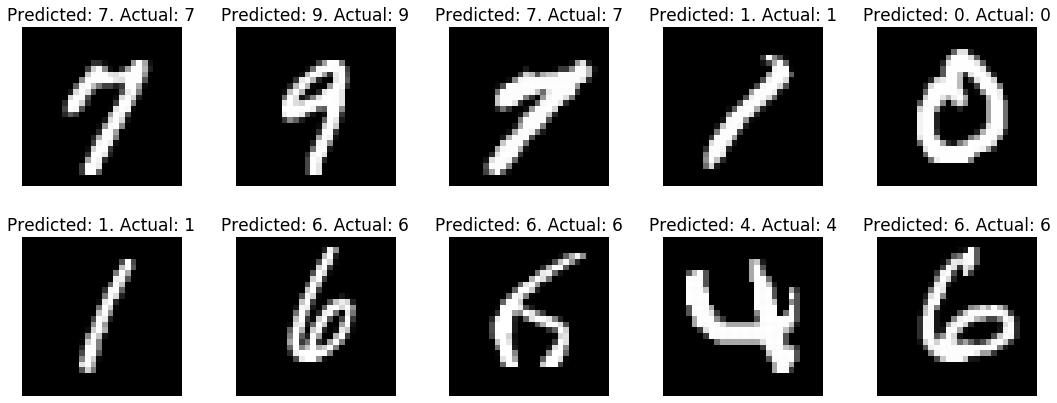

In [16]:
inds = random.sample(list(correct), 10)

fig, ax = plt.subplots(2, 5, figsize=(15,6))

for i, ind in enumerate(inds):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[ind].reshape(img_rows, img_cols), cmap=cm.gray)
    plt.axis('off')
    plt.title(f'Predicted: {y_pred[ind]}. Actual: {y_test_classes[ind]}', size=17)

plt.tight_layout()

#### Incorrect

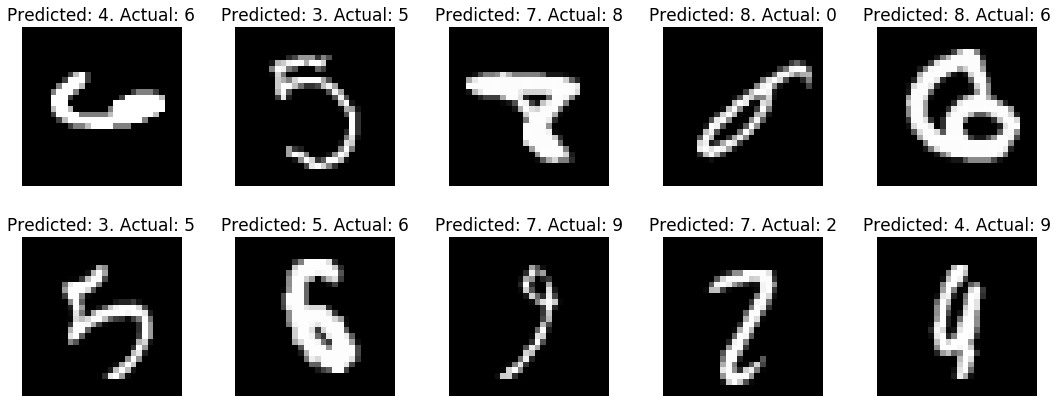

In [17]:
inds = random.sample(list(errors), 10)

fig, ax = plt.subplots(2, 5, figsize=(15,6))

for i, ind in enumerate(inds):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[ind].reshape(img_rows, img_cols), cmap=cm.gray)
    plt.axis('off')
    plt.title(f'Predicted: {y_pred[ind]}. Actual: {y_test_classes[ind]}', size=17)

plt.tight_layout()

# How does dataset size affect accuracy?

In [18]:
def build_model():
    """Convenience function for building the model."""
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model

In [19]:
# Pick a number of training set sizes to train with
training_set_sizes = [10000, 20000, 30000, 40000, 50000, 60000]

In [20]:
# Loop through the list of training set sizes and train a model on each set.

models = []
_num_epochs = 8
_batch_size = 128

for _num_samples in training_set_sizes:
    # Train on subset of data
    print(f'Number of samples: {_num_samples}')
    _model = build_model()
    _history = _model.fit(x_train[:_num_samples], 
                          y_train[:_num_samples],
              batch_size=_batch_size,
              epochs=_num_epochs,
              verbose=1)
    # Evaluate model on test set
    _score = _model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', _score[0])
    print('Test accuracy:', _score[1])
    # Store the training set size, model, score, and metrics history
    models.append((_num_samples, _model, _score, _history))

Number of samples: 10000
Epoch 1/8
10000/10000 [==============================] - 9s 904us/step - loss: 0.7445 - acc: 0.7677
Epoch 2/8
10000/10000 [==============================] - 8s 831us/step - loss: 0.2370 - acc: 0.9320
Epoch 3/8
10000/10000 [==============================] - 8s 834us/step - loss: 0.1572 - acc: 0.9527
Epoch 4/8
10000/10000 [==============================] - 8s 832us/step - loss: 0.1257 - acc: 0.9632
Epoch 5/8
10000/10000 [==============================] - 8s 832us/step - loss: 0.0985 - acc: 0.9711
Epoch 6/8
10000/10000 [==============================] - 8s 837us/step - loss: 0.0832 - acc: 0.9738
Epoch 7/8
10000/10000 [==============================] - 8s 838us/step - loss: 0.0722 - acc: 0.9771
Epoch 8/8
10000/10000 [==============================] - 8s 830us/step - loss: 0.0615 - acc: 0.9811
Test loss: 0.08184032005313784
Test accuracy: 0.9738
Number of samples: 20000
Epoch 1/8
20000/20000 [==============================] - 17s 866us/step - loss: 0.5135 - acc: 0.8

Text(0.5, 0, 'Samples in training set')

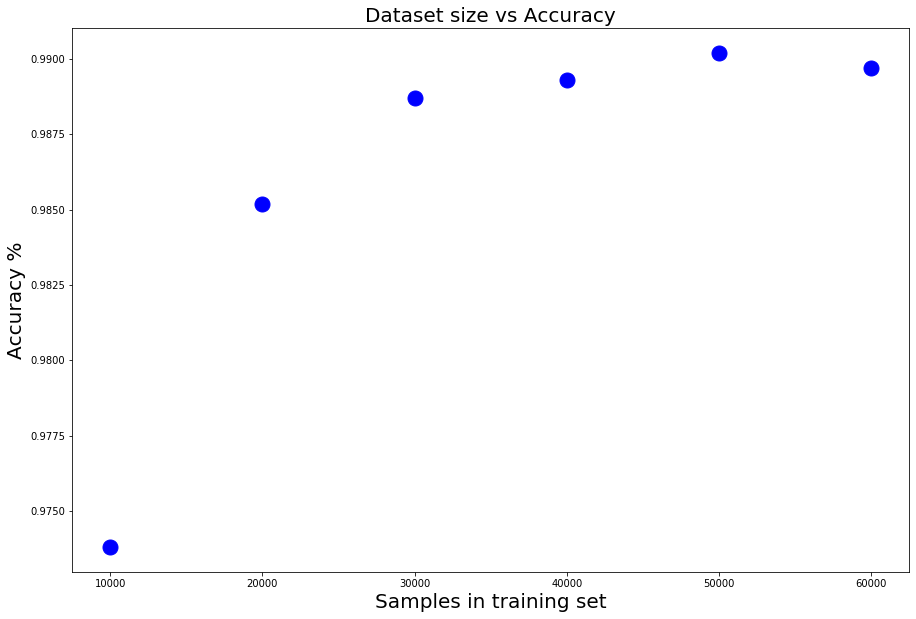

In [21]:
# Plot Dataset Size vs Accuracy

plt.figure(figsize=(15,10))
plt.plot(training_set_sizes, [tup[2][1] for tup in models], 'bo', markersize=15)
plt.title('Dataset size vs Accuracy', size=20)
plt.ylabel('Accuracy %', size=20)
plt.xlabel('Samples in training set', size=20)

![](https://miro.medium.com/max/1000/0*hY-PMxeQFvBuwbTj)